In [74]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import requests
import io
import math
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sb
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt


In [57]:
#read in nut covid #s
c=pd.read_csv('nut_dcc.csv')
c['date']=pd.to_datetime(c['date'])

#read in US #s
url2="https://covidtracking.com/api/v1/us/daily.csv"
s2=requests.get(url2).content
c2=pd.read_csv(io.StringIO(s2.decode('utf-8')))
c2['date']=pd.to_datetime(c2['date'],format ='%Y%m%d')
us_pos = c2[['date','positiveIncrease']]

#read in ut covid #s
url1="https://covidtracking.com/api/v1/states/daily.csv"
s1=requests.get(url1).content
c1=pd.read_csv(io.StringIO(s1.decode('utf-8')))
#filter for UT
ut = c1[c1['state'].str.contains("UT")]
#set dates as datetime
ut['date']=pd.to_datetime(ut['date'],format ='%Y%m%d')
#reset the index
ut.reset_index(drop = True, inplace = True)
#add a percent of tests positive column
ut_pos = ut[['date','positiveIncrease']]
merge1=pd.merge(ut_pos,c, how='inner', on='date')
merge = pd.merge(merge1,us_pos, how='inner', on='date')

/Users/robyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
merge.head()

,date,positiveIncrease_x,slc,davis,wm,hill,positiveIncrease_y
0,2020-05-06,146.0,NaN,NaN,NaN,NaN,22166.0
1,2020-05-05,132.0,54.0,4.0,0.0,0.0,22152.0
2,2020-05-04,142.0,59.0,2.0,0.0,0.0,21447.0
3,2020-05-03,194.0,34.0,1.0,3.0,0.0,26287.0
4,2020-05-02,153.0,78.0,4.0,2.0,0.0,30038.0


In [61]:
#setting plot vars
date = merge['date']
utp = merge['positiveIncrease_x']
usp = merge['positiveIncrease_y']
slc = merge['slc']
wm = merge['wm']
dav = merge['davis']
hill = merge['hill']

ut_14 = merge.positiveIncrease_x.rolling(window=14).mean().shift(-14)
us_14 = merge.positiveIncrease_y.rolling(window=14).mean().shift(-14)

slc_14 = merge.slc.rolling(window=14).mean().shift(-14)
dav_14 = merge.davis.rolling(window=14).mean().shift(-14)
wm_14 = merge.wm.rolling(window=14).mean().shift(-14)
hill_14 = merge.hill.rolling(window=14).mean().shift(-14)



Text(0.5, 0.98, 'New Confirmed Cases by Day\nwith 14-Day Average')

/Users/robyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'US')

Text(0.5, 1.0, 'Utah')

Text(0.5, 1.0, 'Salt Lake County')

Text(0.5, 1.0, 'Davis County')

Text(0.5, 1.0, 'Weber + Morgan County')

Text(0.5, 1.0, 'HAFB')

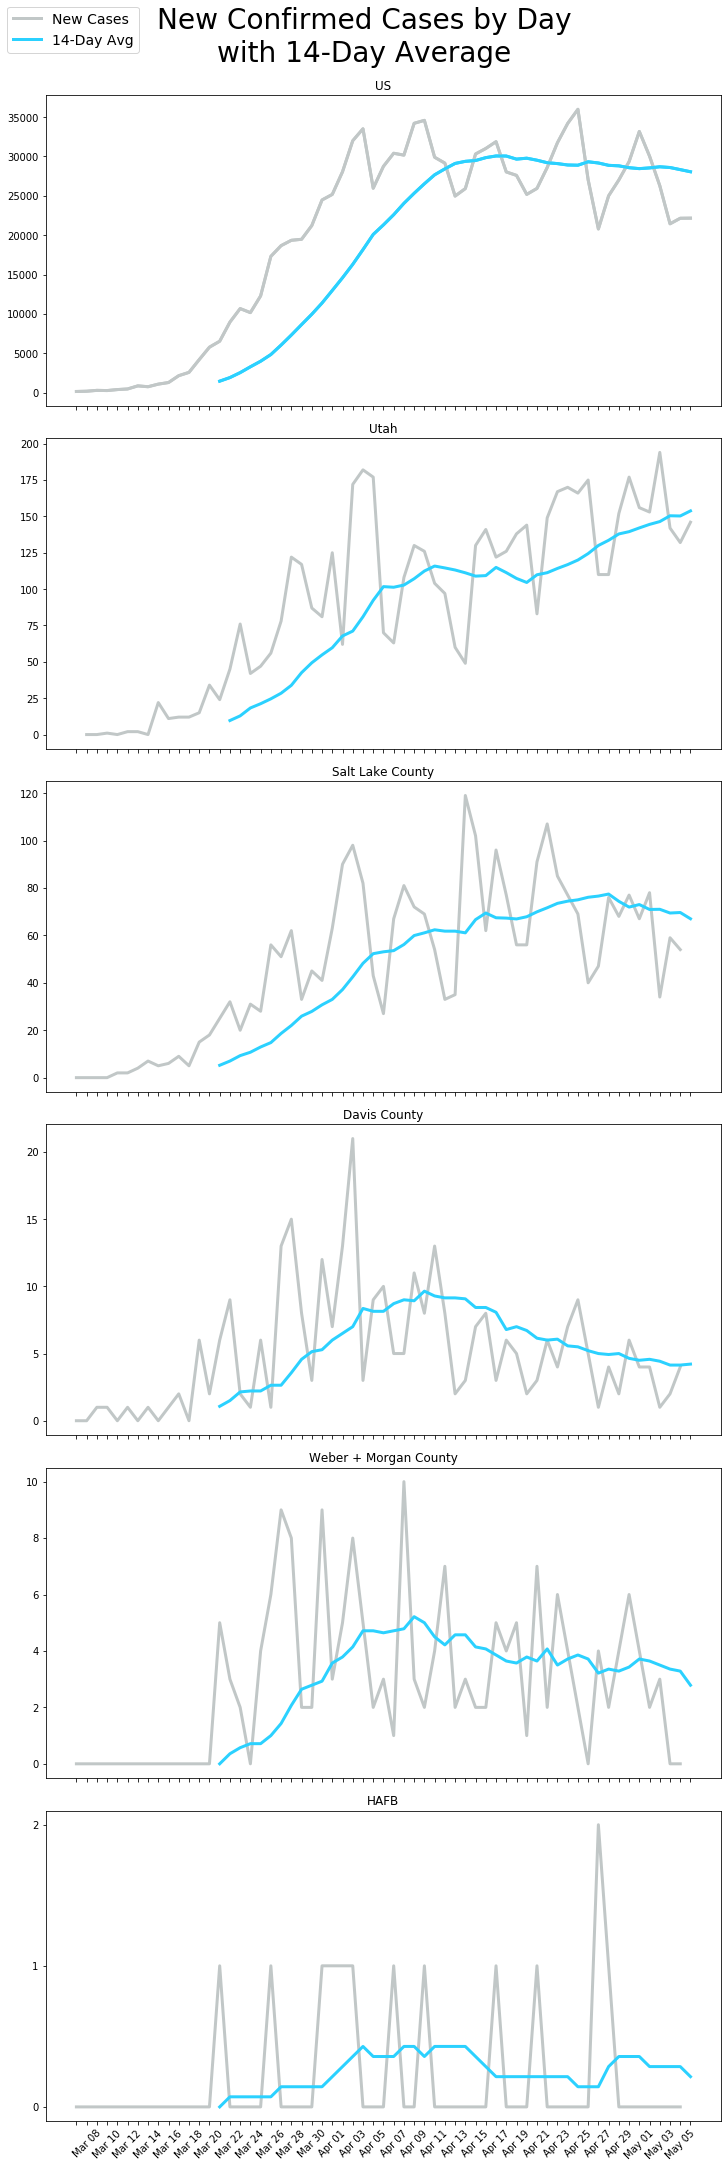

In [81]:
plt.rcParams["figure.figsize"] = (10,30)
spacing = 2

#ax = (ax1, ax2, ax3,ax4,ax5) 
fig, ax= plt.subplots(6, sharex=True,constrained_layout=True)
fig.suptitle('New Confirmed Cases by Day\nwith 14-Day Average', fontsize=28)
nc = ax[0].plot(date, usp, label = 'US',linewidth=3.0,color = '#c1c7c7')
av = ax[0].plot(date,us_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')
labs = ['New Cases', '14-Day Avg']
fig.legend([nc,av],labels=labs,loc = 2,fontsize = 14)

ax[0].plot(date, usp, label = 'US',linewidth=3.0,color = '#c1c7c7')
ax[0].plot(date,us_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')



ax[1].plot(date, utp, label = 'Utah',linewidth=3.0,color = '#c1c7c7')
ax[1].plot(date,ut_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')

ax[2].plot(date, slc, label = 'SLC',linewidth=3.0,color = '#c1c7c7')
ax[2].plot(date,slc_14, label='SLC 14', linewidth = 3.0,color = '#2bd1ff')

ax[3].plot(date, dav, label = 'Davis',linewidth=3.0,color = '#c1c7c7')
ax[3].plot(date,dav_14, label='Davis 14', linewidth = 3.0,color = '#2bd1ff')

ax[4].plot(date, wm, label = 'Weber-Morgan',linewidth=3.0,color = '#c1c7c7')
ax[4].plot(date,wm_14, label='WM 14', linewidth = 3.0,color = '#2bd1ff')

ax[5].plot(date, hill, label = 'Hill',linewidth=3.0,color = '#c1c7c7')
ax[5].plot(date,hill_14, label='Hill 14', linewidth = 3.0,color = '#2bd1ff')
ax[5].yaxis.set_major_locator(MaxNLocator(integer=True))

ax[5].set_xticks(date)
ax[5].xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

ax[0].set_title('US')
ax[1].set_title('Utah')
ax[2].set_title('Salt Lake County')
ax[3].set_title('Davis County')
ax[4].set_title('Weber + Morgan County')
ax[5].set_title('HAFB')

#set ticks every week
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

for label in ax[5].xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

#ax5.xaxis.set_minor_formatter(mdates.DateFormatter("%d"))
_=plt.xticks(rotation=45)  
#fig.legend()

plt.savefig('NewByDay',bbox_inches='tight')

Text(0.5, 0.98, 'New Confirmed Cases by Day\nwith 14-Day Average')

/Users/robyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'US')

Text(0.5, 1.0, 'Utah')

Text(0.5, 1.0, 'Salt Lake County')

Text(0.5, 1.0, 'Davis County')

Text(0.5, 1.0, 'Weber + Morgan County')

Text(0.5, 1.0, 'HAFB')

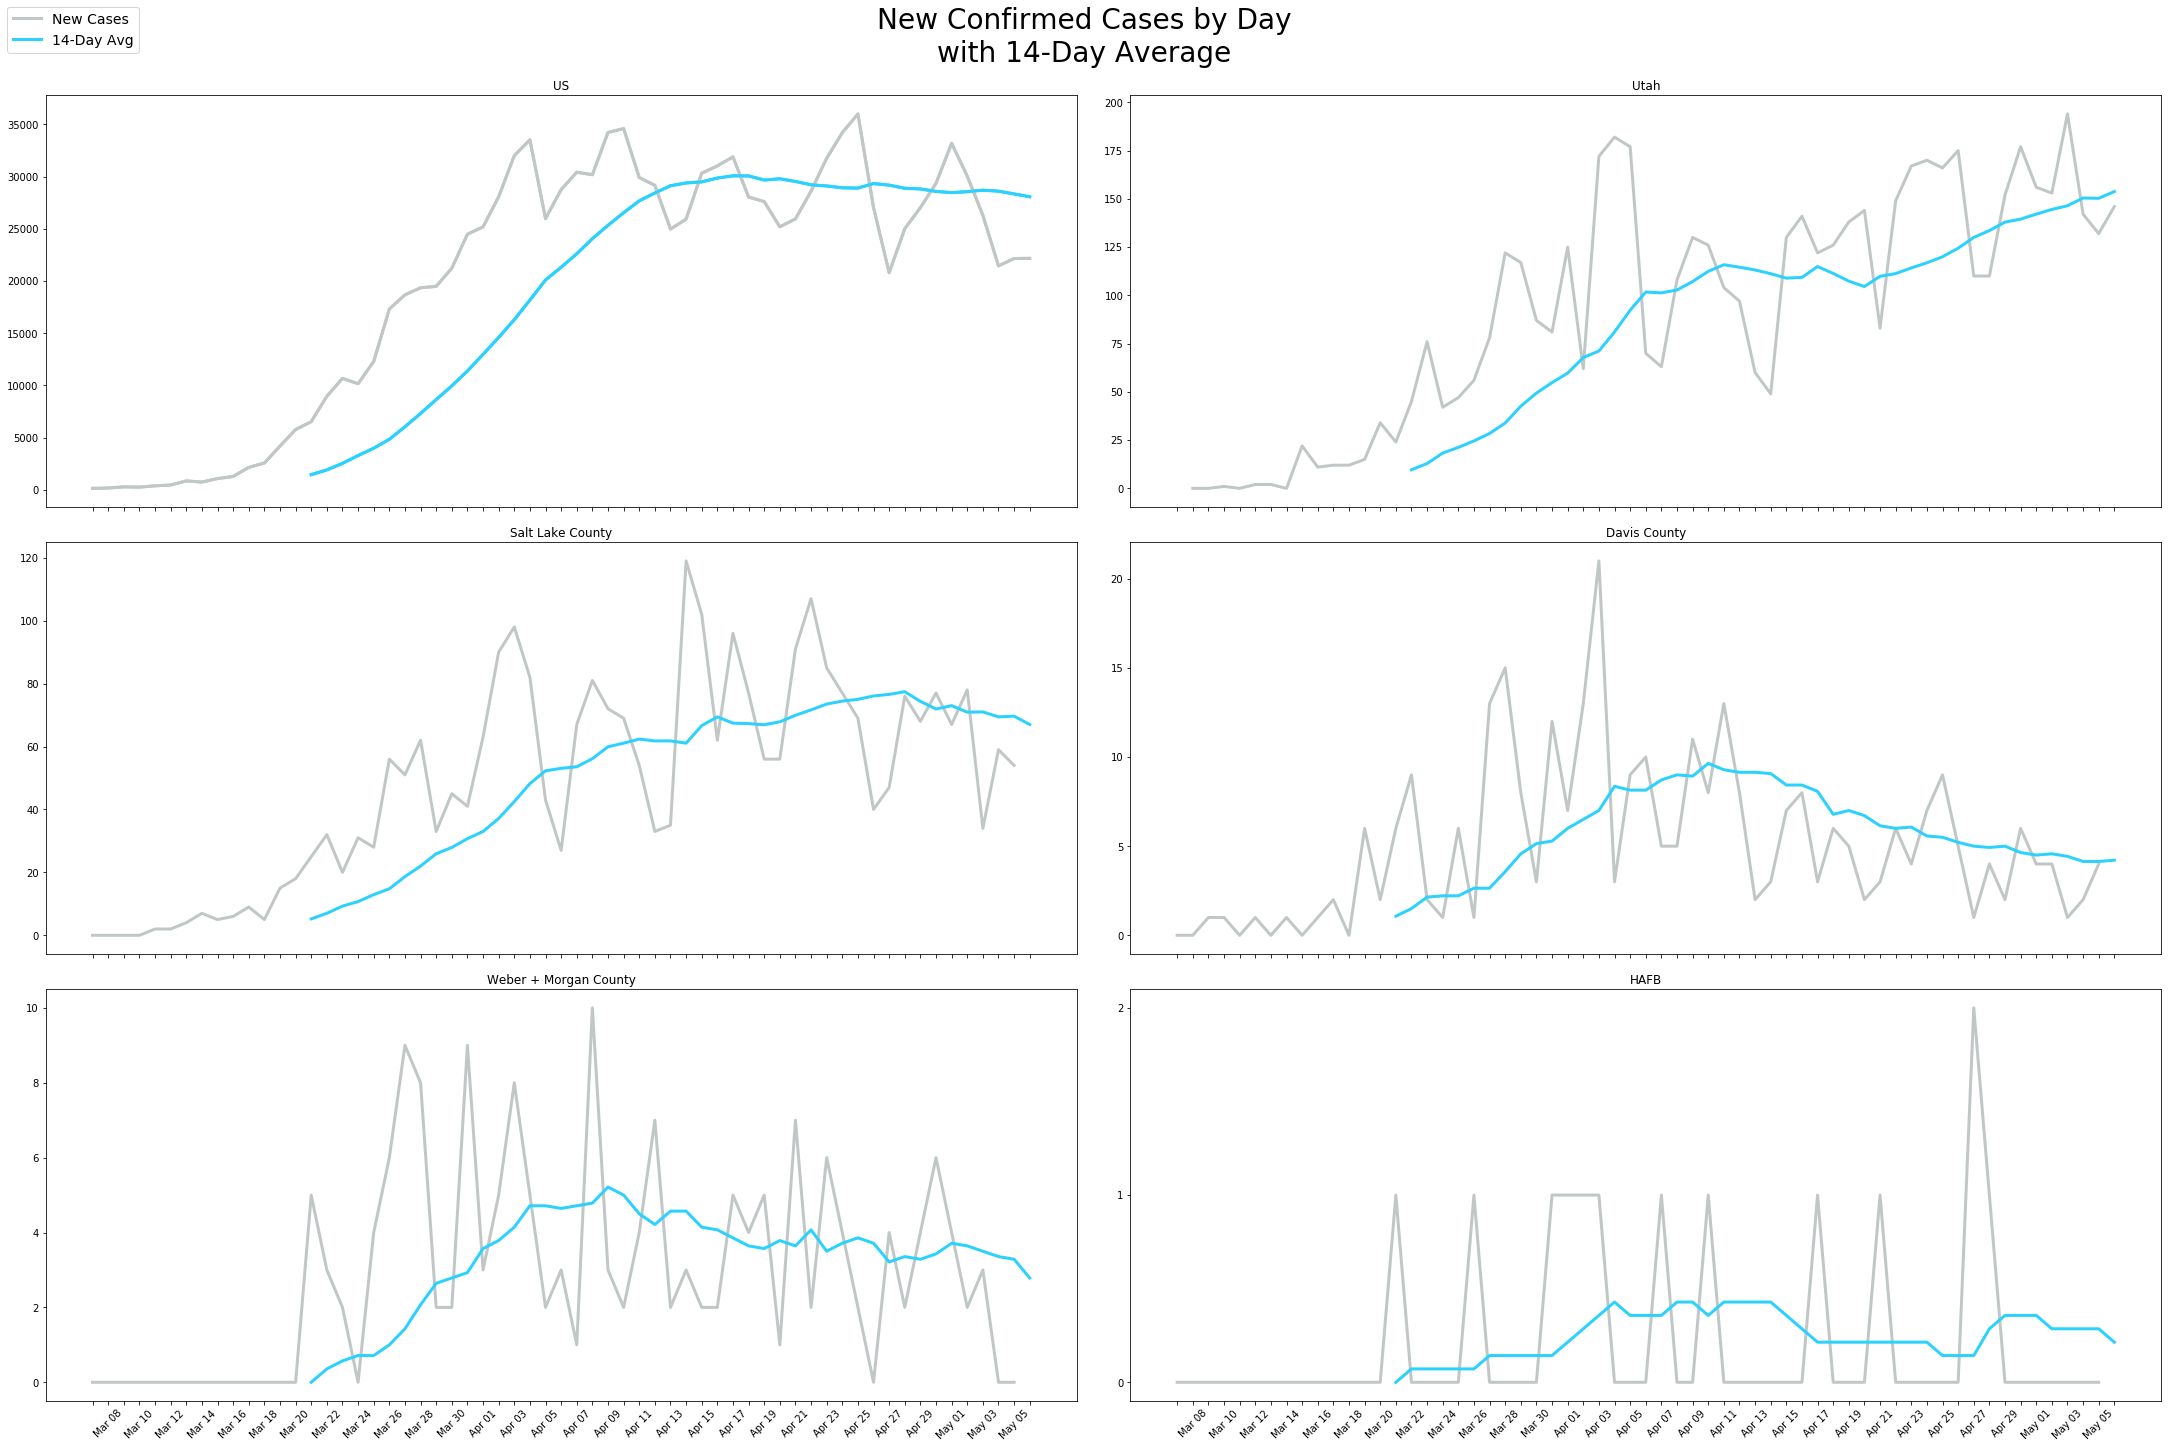

In [105]:
plt.rcParams["figure.figsize"] = (30,20)
spacing = 2

fig, ((ax0, ax1), (ax2,ax3), (ax4, ax5)) = plt.subplots(3, 2,sharex = 'col',constrained_layout=True)
#fig.suptitle('Sharing x per column, y per row')

#for ax in fig.get_axes():
   # ax.label_outer()
#ax = (ax1, ax2, ax3,ax4,ax5) 
#fig, ax= plt.subplots(6, sharex=True,constrained_layout=True)
fig.suptitle('New Confirmed Cases by Day\nwith 14-Day Average', fontsize=28)
nc = ax0.plot(date, usp, label = 'US',linewidth=3.0,color = '#c1c7c7')
av = ax0.plot(date,us_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')
labs = ['New Cases', '14-Day Avg']
fig.legend([nc,av],labels=labs,loc = 2,fontsize = 14)


ax0.plot(date, usp, label = 'US',linewidth=3.0,color = '#c1c7c7')
ax0.plot(date,us_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')

ax1.plot(date, utp, label = 'Utah',linewidth=3.0,color = '#c1c7c7')
ax1.plot(date,ut_14, label='Utah 14', linewidth = 3.0,color = '#2bd1ff')

ax2.plot(date, slc, label = 'SLC',linewidth=3.0,color = '#c1c7c7')
ax2.plot(date,slc_14, label='SLC 14', linewidth = 3.0,color = '#2bd1ff')

ax3.plot(date, dav, label = 'Davis',linewidth=3.0,color = '#c1c7c7')
ax3.plot(date,dav_14, label='Davis 14', linewidth = 3.0,color = '#2bd1ff')

ax4.plot(date, wm, label = 'Weber-Morgan',linewidth=3.0,color = '#c1c7c7')
ax4.plot(date,wm_14, label='WM 14', linewidth = 3.0,color = '#2bd1ff')
ax4.set_xticks(date)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
for label in ax4.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)


ax5.plot(date, hill, label = 'Hill',linewidth=3.0,color = '#c1c7c7')
ax5.plot(date,hill_14, label='Hill 14', linewidth = 3.0,color = '#2bd1ff')
ax5.yaxis.set_major_locator(MaxNLocator(integer=True))
ax5.set_xticks(date)
ax5.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
for label in ax5.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)




ax0.set_title('US')
ax1.set_title('Utah')
ax2.set_title('Salt Lake County')
ax3.set_title('Davis County')
ax4.set_title('Weber + Morgan County')
ax5.set_title('HAFB')

plt.savefig('NewByDay2',bbox_inches='tight')